In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data="sheet1"
df=pd.read_excel("glass.xlsx",sheet_name=1)

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.shape

(214, 10)

In [5]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(1)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(0)

<Axes: >

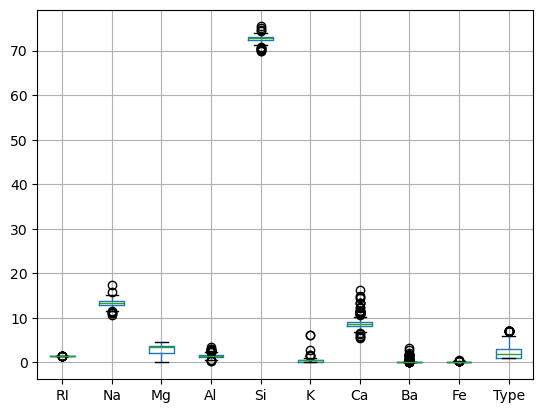

In [10]:
df.boxplot()

In [11]:
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    Lower_Extreme=Q1-1.5*IQR
    Upper_Extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x:Lower_Extreme if x<Lower_Extreme else Upper_Extreme if x>Upper_Extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

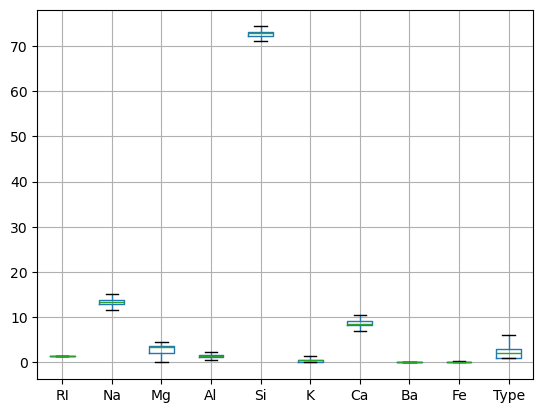

In [12]:
df.boxplot()
plt.show()

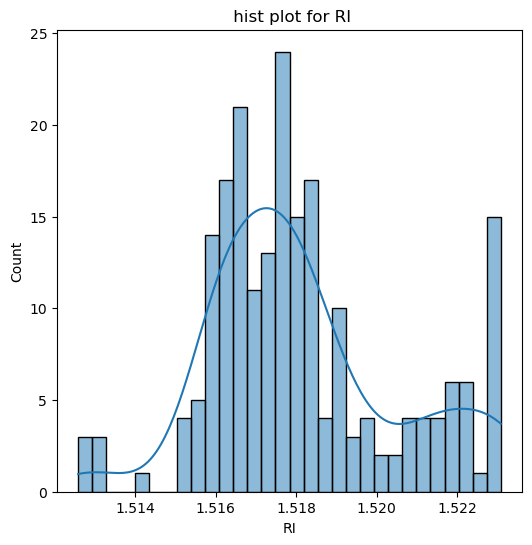

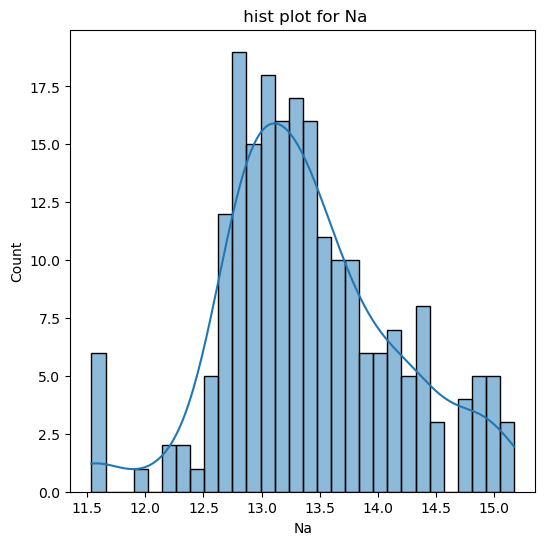

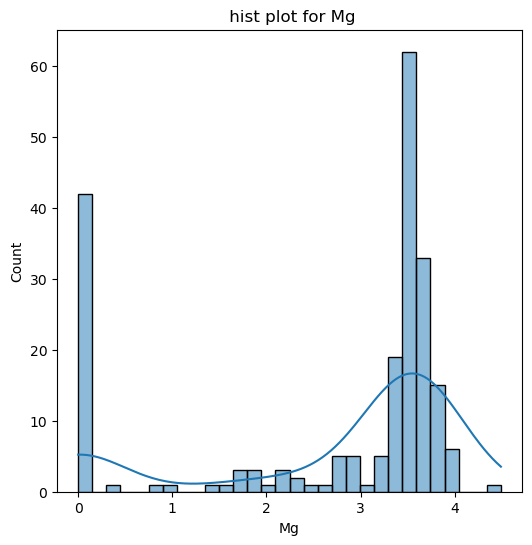

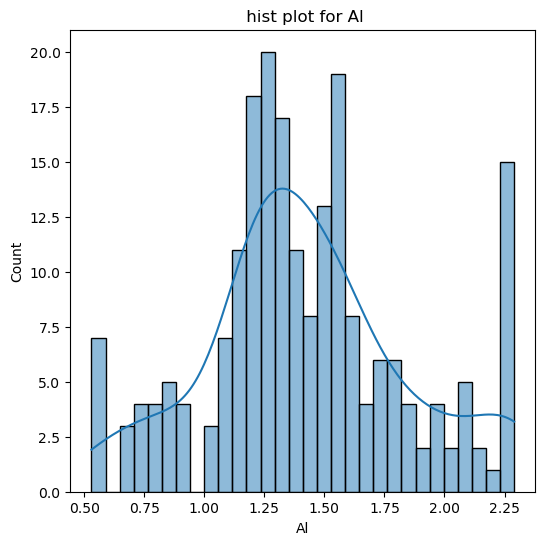

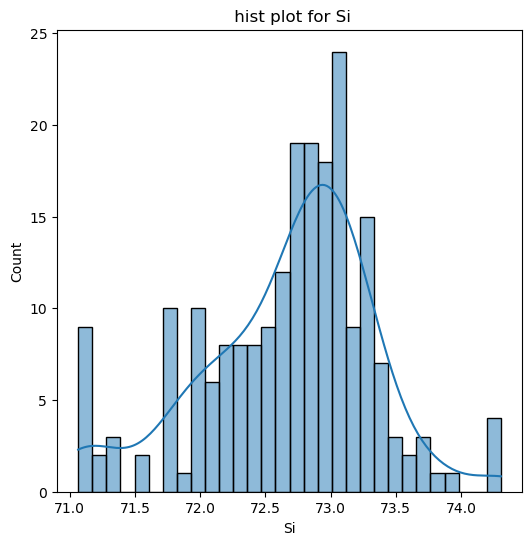

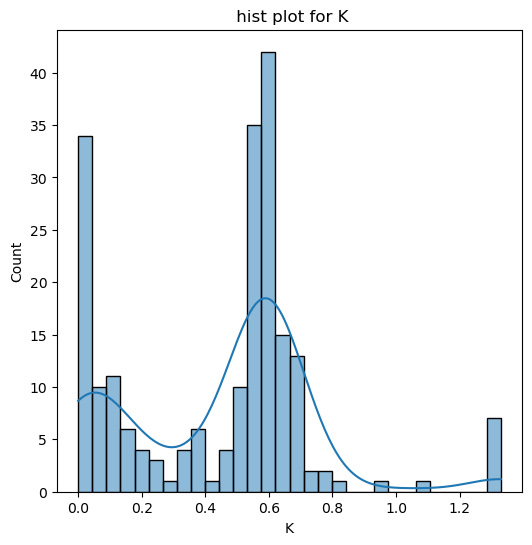

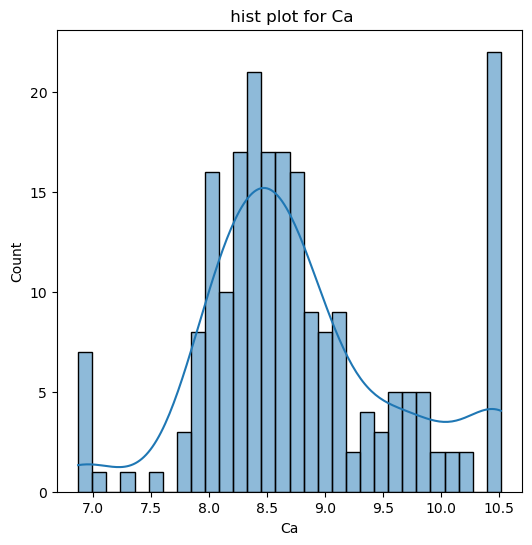

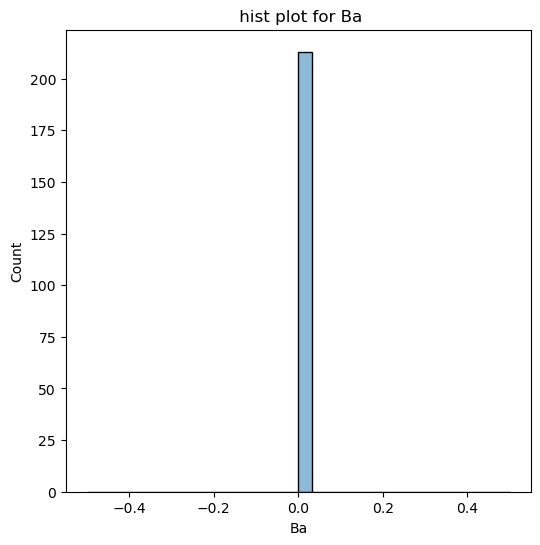

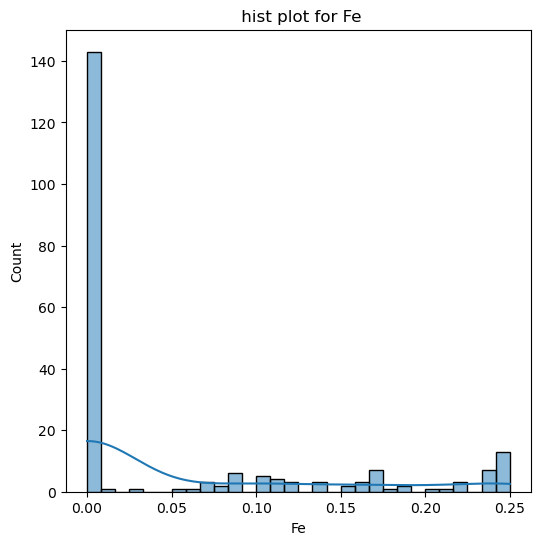

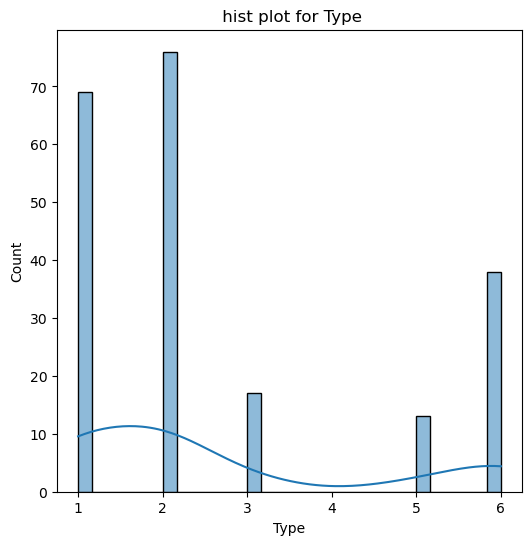

In [14]:
for i in df:
    plt.figure(figsize=[6,6])
    sns.histplot(df[i],kde=True,bins=30)
    plt.title(f" hist plot for {i}")
    plt.show()

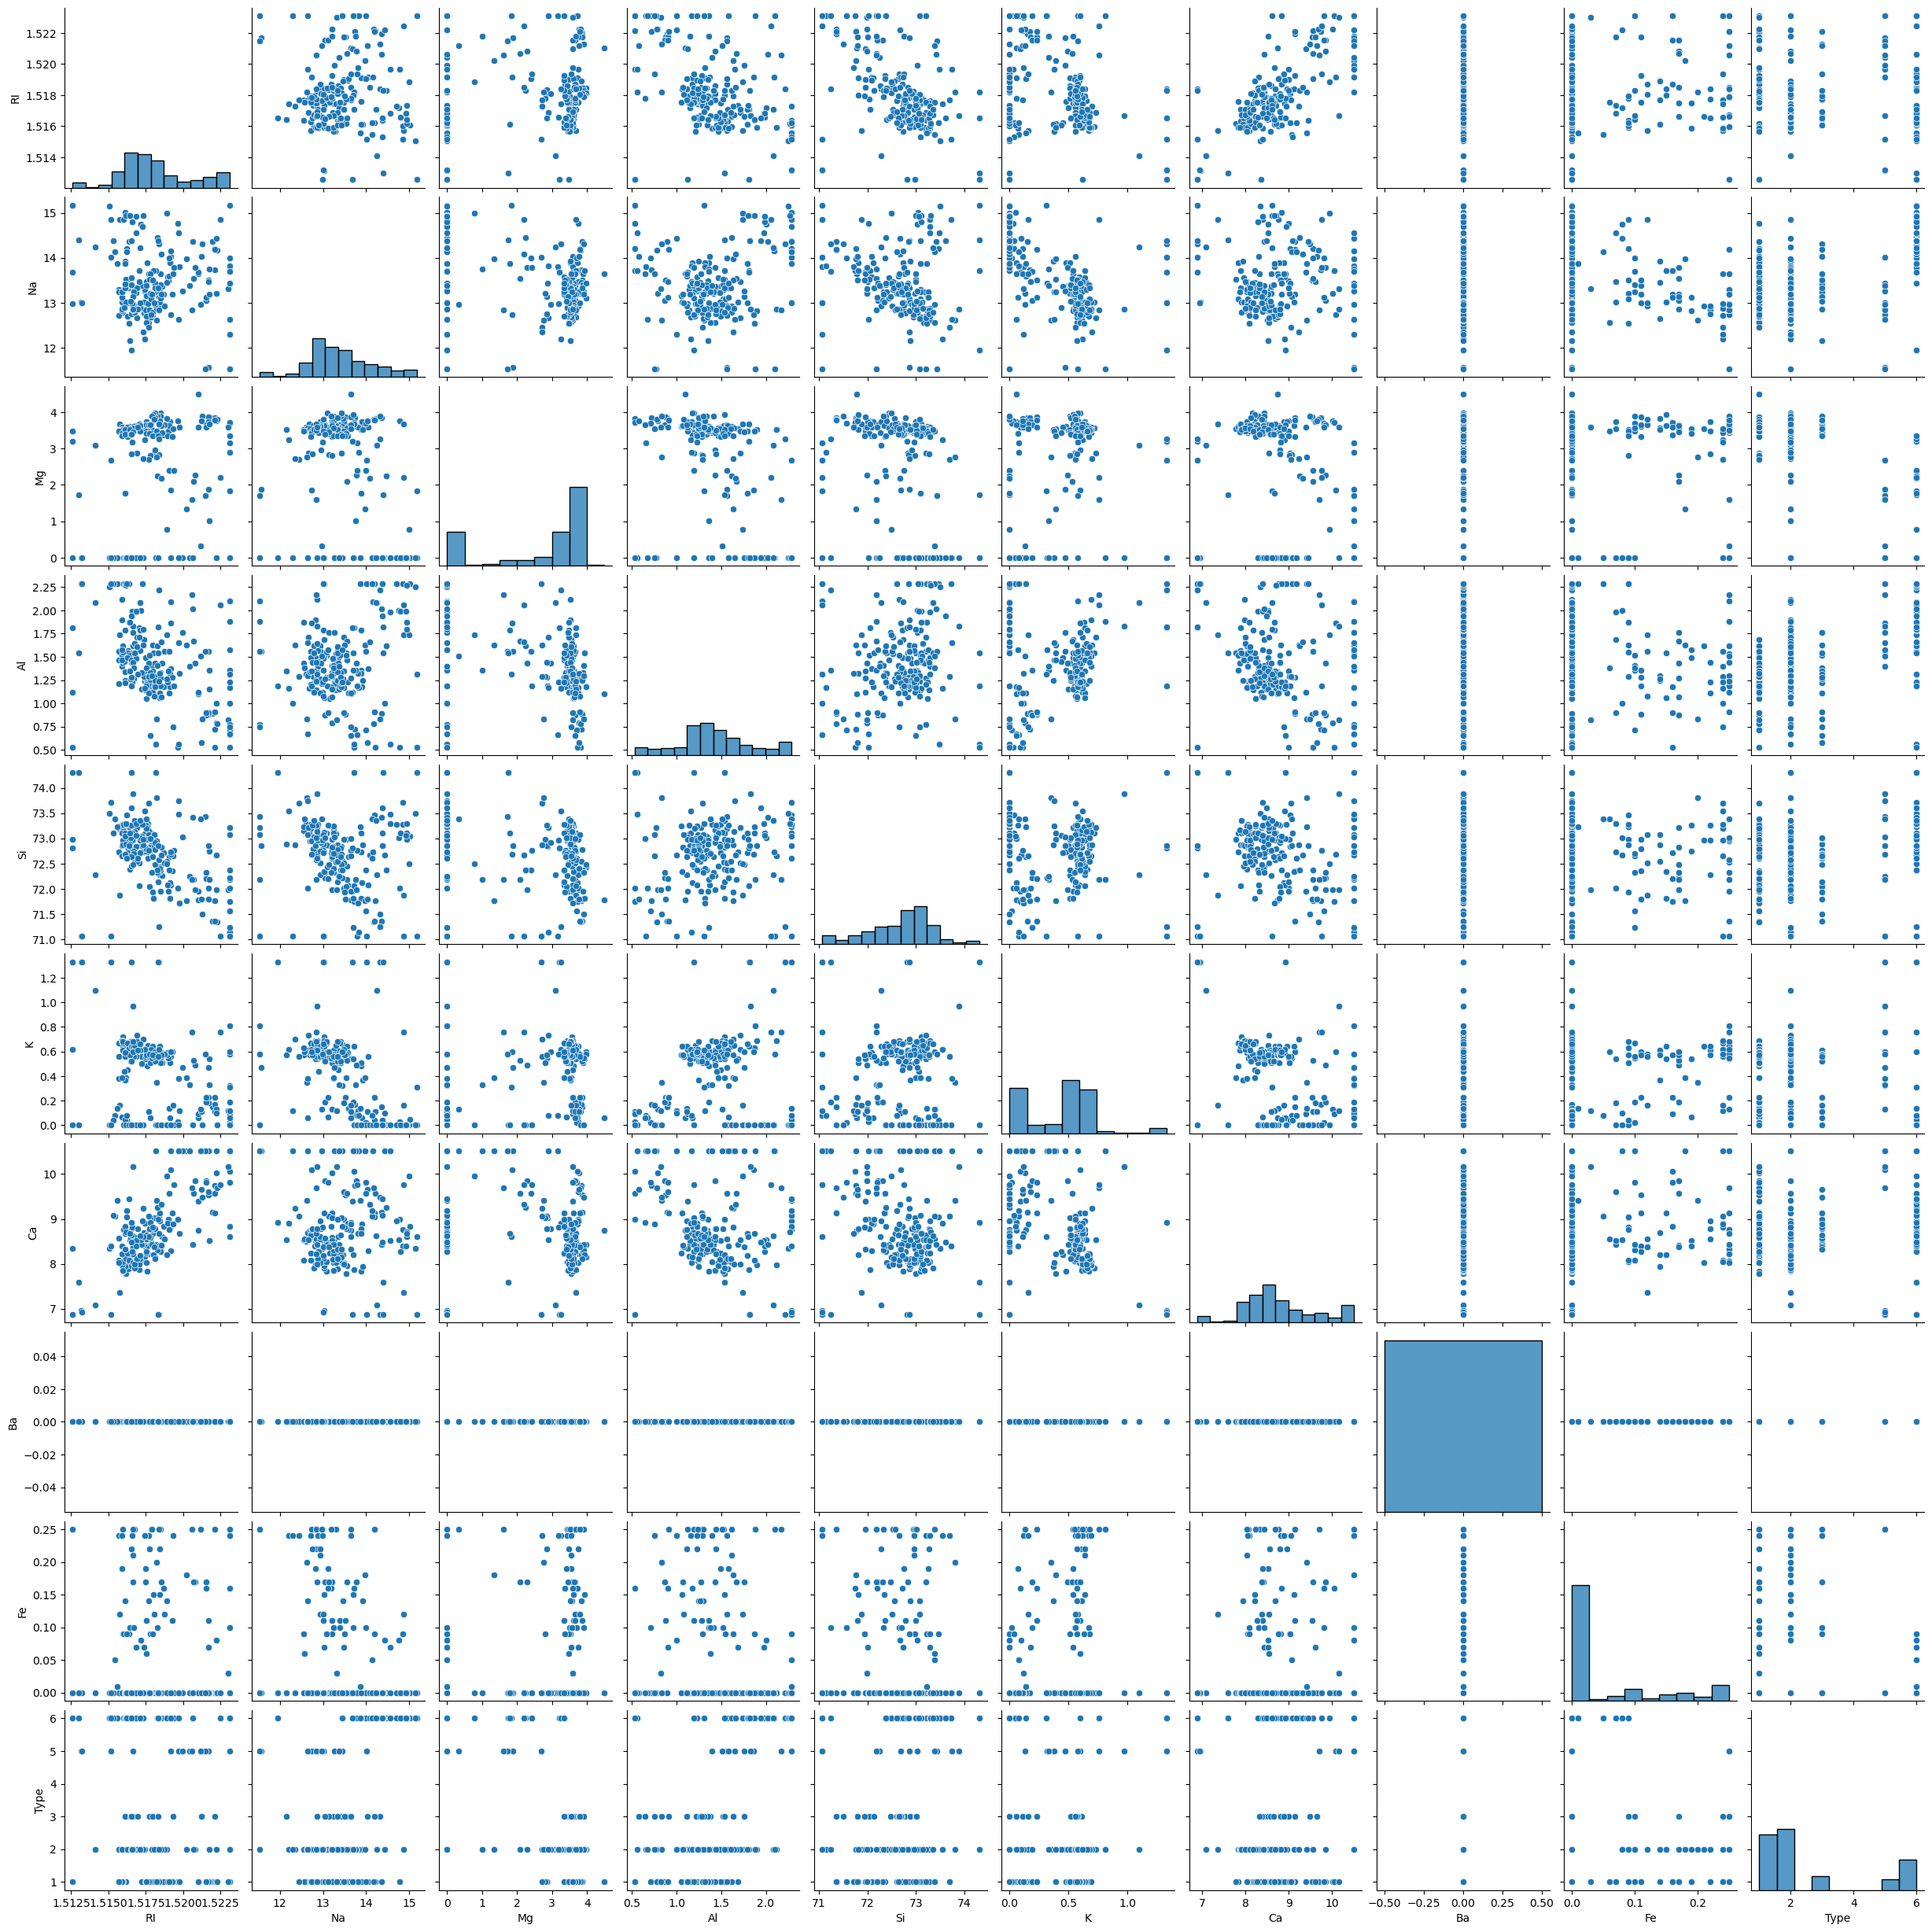

In [15]:
sns.pairplot(df)
plt.show()

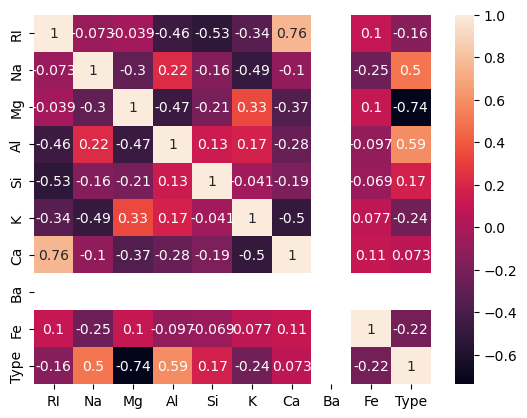

In [20]:
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

# Data Processing

In [21]:
target=df[["Type"]]
features=df.drop(columns=["Type"])
target

,Type
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
209,6.0
210,6.0
211,6.0
212,6.0


In [25]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from imblearn.over_sampling import SMOTE
std_sca=StandardScaler()
fea_sca=pd.DataFrame(std_sca.fit_transform(features))


In [26]:
fea_sca

,0,1,2,3,4,5,6,7,8
0,1.216093,0.322680,1.257238,-0.773927,-1.361078,-1.253536,-0.044419,0.0,-0.621102
1,-0.227207,0.660556,0.639311,-0.154741,0.086641,0.124799,-1.115733,0.0,-0.621102
2,-0.834242,0.174014,0.604596,0.273927,0.482859,-0.170559,-1.173956,0.0,-0.621102
3,-0.205982,-0.258467,0.701798,-0.321445,-0.096228,0.420156,-0.661589,0.0,-0.621102
4,-0.307862,-0.177377,0.653197,-0.440519,0.620012,0.354521,-0.836260,0.0,-0.621102
...,...,...,...,...,...,...,...,...,...
208,-0.813017,0.998432,-1.860172,2.060042,-0.096228,-1.187901,0.456303,0.0,-0.621102
209,-0.549827,2.052606,-1.860172,1.345596,0.589533,-1.450441,-0.451984,0.0,-0.621102
210,1.063273,1.295764,-1.860172,1.417041,1.138143,-1.450441,-0.405405,0.0,-0.621102
211,-0.694157,1.322794,-1.860172,1.226522,1.427687,-1.450441,-0.358827,0.0,-0.621102


In [27]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(fea_sca,target)

In [28]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

# Random Forest

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [30]:
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2, random_state=100, stratify=y_resampled)

In [31]:
ran_for=RandomForestClassifier(random_state=100, n_estimators=100)
ran_for.fit(x_train,y_train)
y_pred=ran_for.predict(x_test)
y_pred

C:\Users\Raghul\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array([2., 6., 3., 2., 2., 3., 5., 1., 6., 5., 6., 1., 6., 5., 3., 1., 1.,
       3., 3., 5., 5., 1., 3., 6., 5., 1., 2., 6., 6., 2., 5., 6., 2., 3.,
       5., 5., 1., 5., 2., 2., 1., 6., 3., 3., 1., 5., 1., 5., 5., 1., 3.,
       3., 2., 6., 6., 5., 5., 6., 3., 2., 6., 2., 2., 3., 5., 3., 3., 6.,
       2., 5., 6., 3., 1., 3., 2., 1.])

In [32]:
accuracy_score(y_test,y_pred)

0.9342105263157895

# Bagging and Boosting

In [33]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

In [34]:
bag_class=BaggingClassifier(estimator=LogisticRegression(),n_estimators=100,max_samples=0.9,max_features=0.9,random_state=100)
bag_class.fit(x_train,y_train)
y_pred=bag_class.predict(x_test)
accuracy_score(y_test,y_pred)

C:\Users\Raghul\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8026315789473685

In [35]:
boosting_model = AdaBoostClassifier(random_state=100, n_estimators=100)
boosting_model.fit(x_train, y_train)
y_pred = boosting_model.predict(x_test)
accuracy_score(y_test,y_pred)

C:\Users\Raghul\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5657894736842105

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        16
         2.0       0.25      0.07      0.11        15
         3.0       0.39      1.00      0.57        15
         5.0       0.70      0.93      0.80        15
         6.0       1.00      0.87      0.93        15

    accuracy                           0.57        76
   macro avg       0.47      0.57      0.48        76
weighted avg       0.46      0.57      0.47        76



In [38]:
conf=confusion_matrix(y_test,y_pred)
conf

array([[ 0,  2, 14,  0,  0],
       [ 1,  1,  9,  4,  0],
       [ 0,  0, 15,  0,  0],
       [ 0,  1,  0, 14,  0],
       [ 0,  0,  0,  2, 13]])

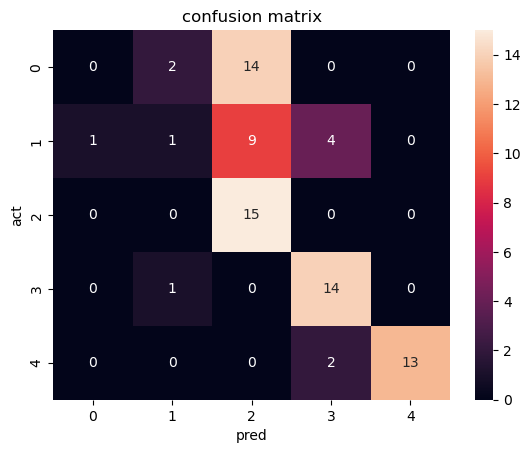

In [39]:
sns.heatmap(conf,annot=True)
plt.xlabel("pred")
plt.ylabel("act")
plt.title("confusion matrix")
plt.show()

# 1. Explain Bagging and Boosting methods. How is it different from each other.

   Bagging builds multiple independent models on bootstrapped samples to reduce variance.
 Boosting builds sequential models emphasizing previous errors, reducing bias.
 Difference: Bagging parallelizes, Boosting corrects mistakes iteratively.